In [28]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
datasurvey = pd.read_csv('https://raw.githubusercontent.com/dhorihasan/dataset/main/Starbucks_satisfactory_survey.csv',sep=',')
print("Data Survey\n",datasurvey.head())

Data Survey
                       Timestamp 1. Your Gender    2. Your Age  \
0  2019/10/01 12:38:43 PM GMT+8         Female  From 20 to 29   
1  2019/10/01 12:38:54 PM GMT+8         Female  From 20 to 29   
2  2019/10/01 12:38:56 PM GMT+8           Male  From 20 to 29   
3  2019/10/01 12:39:08 PM GMT+8         Female  From 20 to 29   
4  2019/10/01 12:39:20 PM GMT+8           Male  From 20 to 29   

  3. Are you currently....? 4. What is your annual income?  \
0                   Student             Less than RM25,000   
1                   Student             Less than RM25,000   
2                  Employed             Less than RM25,000   
3                   Student             Less than RM25,000   
4                   Student             Less than RM25,000   

  5. How often do you visit Starbucks? 6. How do you usually enjoy Starbucks?  \
0                               Rarely                                Dine in   
1                               Rarely                       

In [29]:
#Info Hasil Data Survey
print("Info Dataset: \n",datasurvey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype 
---  ------                                                                                                                  --------------  ----- 
 0   Timestamp                                                                                                               122 non-null    object
 1   1. Your Gender                                                                                                          122 non-null    object
 2   2. Your Age                                                                                                             122 non-null    object
 3   3. Are you currently....?                                                                                               122 non-null    object
 4   4.

In [30]:
# Group by Gender untuk membuat data series berdasarkan gender dimana
# Female : 0
# Male : 1
ds_s1 = pd.Series(datasurvey.groupby(['1. Your Gender'],as_index=True)['1. Your Gender'].count())
datasurvey['1. Your Gender']=datasurvey['1. Your Gender'].map({'Female':0, 'Male':1})
#print("Info Dataset: \n",datasurvey.info())

In [31]:
# Group by Age untuk membuat data series berdasarkan pembagian umur sebagai berikut
# Below 20 : 0
# From 20 to 29 : 1
# From 30 to 39 : 2
# 40 and above : 3

ds_s2 = pd.Series(datasurvey.groupby(['2. Your Age'])['2. Your Age'].count())
datasurvey['2. Your Age']=datasurvey['2. Your Age'].map({'Below 20':0, 'From 20 to 29':1, 'From 30 to 39':2, '40 and above':3})


In [32]:
# Group by 3. Are you currently....? data saries berdasarkan pembagian sebagai berikut
# Student : 0
# Employed : 1
# Self-employed : 2
# Housewife : 3
ds_s3 = pd.Series(datasurvey.groupby(['3. Are you currently....?'])['3. Are you currently....?'].count())
datasurvey['3. Are you currently....?']=datasurvey['3. Are you currently....?'].map({'Student':0, 'Employed':1, 'Self-employed':2, 'Housewife':3})


In [33]:
# Group by 4. What is your annual income? data series berdasarkan pembagian sebagai berikut
# Less than RM25,000 : 0
# RM25,000 - RM50,000 : 1
# RM50,000 - RM100,000 : 2
# RM100,000 - RM150,000 : 3
# More than RM150,000 : 4
ds_s4 = pd.Series(datasurvey.groupby(['4. What is your annual income?'])['4. What is your annual income?'].count())
datasurvey['4. What is your annual income?']=datasurvey['4. What is your annual income?'].map({'Less than RM25,000':0, 'RM25,000 - RM50,000':1, 'RM50,000 - RM100,000':2, 'RM100,000 - RM150,000':3, 'More than RM150,000':4})

In [34]:
# Group by  5. How often do you visit Starbucks? untuk membuat data series berdasarkan gender dimana
# Daily : 0
# Weekly : 1
# Monthly : 2
# Rarely : 3
# Never : 4
ds_s5 = pd.Series(datasurvey.groupby(['5. How often do you visit Starbucks?'],as_index=True)['5. How often do you visit Starbucks?'].count())
datasurvey['5. How often do you visit Starbucks?']=datasurvey['5. How often do you visit Starbucks?'].map({'Daily':0, 'Weekly':1, 'Monthly':2, 'Rarely':3, 'Never':4})

In [35]:
# Group by 6. How do you usually enjoy Starbucks? untuk membuat data series berdasarkan gender dimana
# Dine in : 0
# Drive-thru : 1
# I dont like coffee : 2
# Never : 3
# Never : 3
# Never buy : 4
# Take away : 5
# never : 3
ds_s6 = pd.Series(datasurvey.groupby(['6. How do you usually enjoy Starbucks?'],as_index=True)['6. How do you usually enjoy Starbucks?'].count())
datasurvey['6. How do you usually enjoy Starbucks?']=datasurvey['6. How do you usually enjoy Starbucks?'].map({'Dine in':0, 'Drive-thru':1, 'I dont like coffee':2, 'Never' or 'never':3, 'Never buy':4, 'Take away':5})
# Karena ada nilai NAN di columns setelah maping, dimana nilai tersebut 'Never' dengan ketentuan dirubah menjadi 3 
datasurvey['6. How do you usually enjoy Starbucks?'] = datasurvey['6. How do you usually enjoy Starbucks?'].fillna(3)

In [36]:
# Group by 7. How much time do you normally  spend during your visit? data saries berdasarkan pembagian sebagai berikut
# Below 30 minutes : 0
# Between 30 minutes to 1 hour : 1
# Between 1 hour to 2 hours : 2
# Between 2 hours to 3 hours : 3
# More than 3 hours : 4
ds_s7 = pd.Series(datasurvey.groupby(['7. How much time do you normally  spend during your visit?'])['7. How much time do you normally  spend during your visit?'].count())
datasurvey['7. How much time do you normally  spend during your visit?']=datasurvey['7. How much time do you normally  spend during your visit?'].map({'Below 30 minutes':0, 'Between 30 minutes to 1 hour':1, 'Between 1 hour to 2 hours':2, 'Between 2 hours to 3 hours':3, 'More than 3 hours':4})


In [37]:
# Group by 8. The nearest Starbucks's outlet to you is...? data saries berdasarkan pembagian sebagai berikut
# within 1km : 0
# 1km - 3km : 1
# more than 3km : 2

# Merubah nama columns dari Starbuks's ke Starbuks agar standard dengan columns lainnya
datasurvey=datasurvey.rename(columns={"8. The nearest Starbucks's outlet to you is...?":"8. The nearest Starbucks outlet to you is...?"})
ds_s8 = pd.Series(datasurvey.groupby(["8. The nearest Starbucks outlet to you is...?"])["8. The nearest Starbucks outlet to you is...?"].count())
datasurvey['8. The nearest Starbucks outlet to you is...?']=datasurvey['8. The nearest Starbucks outlet to you is...?'].map({'within 1km':0, '1km - 3km':1, 'more than 3km':2})

In [38]:
# Group by 9. Do you have Starbucks membership card? data saries berdasarkan pembagian sebagai berikut
# No : 0
# Yes : 1
ds_s9 = pd.Series(datasurvey.groupby(["9. Do you have Starbucks membership card?"])["9. Do you have Starbucks membership card?"].count())
datasurvey['9. Do you have Starbucks membership card?']=datasurvey['9. Do you have Starbucks membership card?'].map({'No':0, 'Yes':1})

In [39]:
# Group by 10. What do you most frequently purchase at Starbucks? data saries berdasarkan pembagian sebagai berikut
# Buy Coffee, Buy Cold Drink, Buy Other, No Buy dengan menghitung berapa kali string tersebut muncul
ds_s10 = pd.Series(datasurvey.groupby(["10. What do you most frequently purchase at Starbucks?"])["10. What do you most frequently purchase at Starbucks?"].count())
ds_s10

split01 = pd.Series(datasurvey['10. What do you most frequently purchase at Starbucks?'].str.strip())

datasurvey.insert(11,'Buy Coffee',split01.str.count('Coffee'),True)
datasurvey.insert(12,'Buy Cold Drinks',split01.str.count('Cold drinks'),True)
datasurvey.insert(13,'Buy Other',split01.str.count('Juices' or 'Pastries' or 'Sandwiches' or 'Jaws chip ' or 'cake '),True)
datasurvey.insert(14,'No Buy',split01.str.count('Never' or 'Never buy any' or 'Nothing' or 'never'),True)

In [40]:
# Group by 11. On average, how much would you spend at Starbucks per visit? data saries berdasarkan pembagian sebagai berikut
# Zero : 0
# Less than RM20 : 1
# Around RM20 - RM40 : 2
# More than RM40 : 3
ds_s11 = pd.Series(datasurvey.groupby(["11. On average, how much would you spend at Starbucks per visit?"])["11. On average, how much would you spend at Starbucks per visit?"].count())
datasurvey['11. On average, how much would you spend at Starbucks per visit?']=datasurvey['11. On average, how much would you spend at Starbucks per visit?'].map({'Zero':0, 'Less than RM20':1, 'Around RM20 - RM40':2, 'More than RM40':3})

In [41]:
# Group by 19. How do you come to hear of promotions at Starbucks? Check all that apply. data saries berdasarkan pembagian sebagai berikut
# Zero : 0
# Less than RM20 : 1
# Around RM20 - RM40 : 2
# More than RM40 : 3
ds_s12 = pd.Series(datasurvey.groupby(["19. How do you come to hear of promotions at Starbucks? Check all that apply."])["19. How do you come to hear of promotions at Starbucks? Check all that apply."].count())
ds_s12

split02 = pd.Series(datasurvey['19. How do you come to hear of promotions at Starbucks? Check all that apply.'].str.strip())
datasurvey.insert(21,'Application',split02.str.count('Application offer'),True)
datasurvey.insert(22,'Billboards',split02.str.count('Billboards'),True)
datasurvey.insert(23,'Emails',split02.str.count('Emails'),True)
datasurvey.insert(24,'In Store displays',split02.str.count('In Store displays'),True)
datasurvey.insert(25,'Social Media',split02.str.count('Social Media'),True)
datasurvey.insert(26,'Deal sites (fave, iprice, etc...)',split02.str.count('Deal sites (fave, iprice, etc...)'),True)
datasurvey.insert(27,'Through friends and word of mouth',split02.str.count('Through friends and word of mouth'),True)
datasurvey.insert(28,'Starbucks Website/Apps',split02.str.count('Starbucks Website/Apps'),True)
datasurvey.insert(29,'Never hear',split02.str.count('Never hear'),True)

In [42]:
# Group by 20. Will you continue buying at Starbucks? data saries berdasarkan pembagian sebagai berikut
# No : 0
# Yes : 1

ds_s13 = pd.Series(datasurvey.groupby(["20. Will you continue buying at Starbucks?"])["20. Will you continue buying at Starbucks?"].count())
datasurvey['20. Will you continue buying at Starbucks?']=datasurvey['20. Will you continue buying at Starbucks?'].map({'No':0, 'Yes':1})


In [43]:
# Menghapus columns yang tidak diperlukan setelah proses encodeng menjadi angka atau interger
datasurvey = datasurvey.drop(columns=['10. What do you most frequently purchase at Starbucks?',
'19. How do you come to hear of promotions at Starbucks? Check all that apply.','Timestamp'])
datasurvey = datasurvey.dropna()
# Create columns Customer ID
datasurvey.insert(loc=0, column='Customer ID',value=datasurvey.index + 1)
print('Info datasurvey_final\n',datasurvey.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121 entries, 0 to 121
Data columns (total 32 columns):
 #   Column                                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                                  --------------  -----  
 0   Customer ID                                                                                                             121 non-null    int64  
 1   1. Your Gender                                                                                                          121 non-null    int64  
 2   2. Your Age                                                                                                             121 non-null    int64  
 3   3. Are you currently....?                                                                                               121 non-null    int64  
 

<AxesSubplot:>

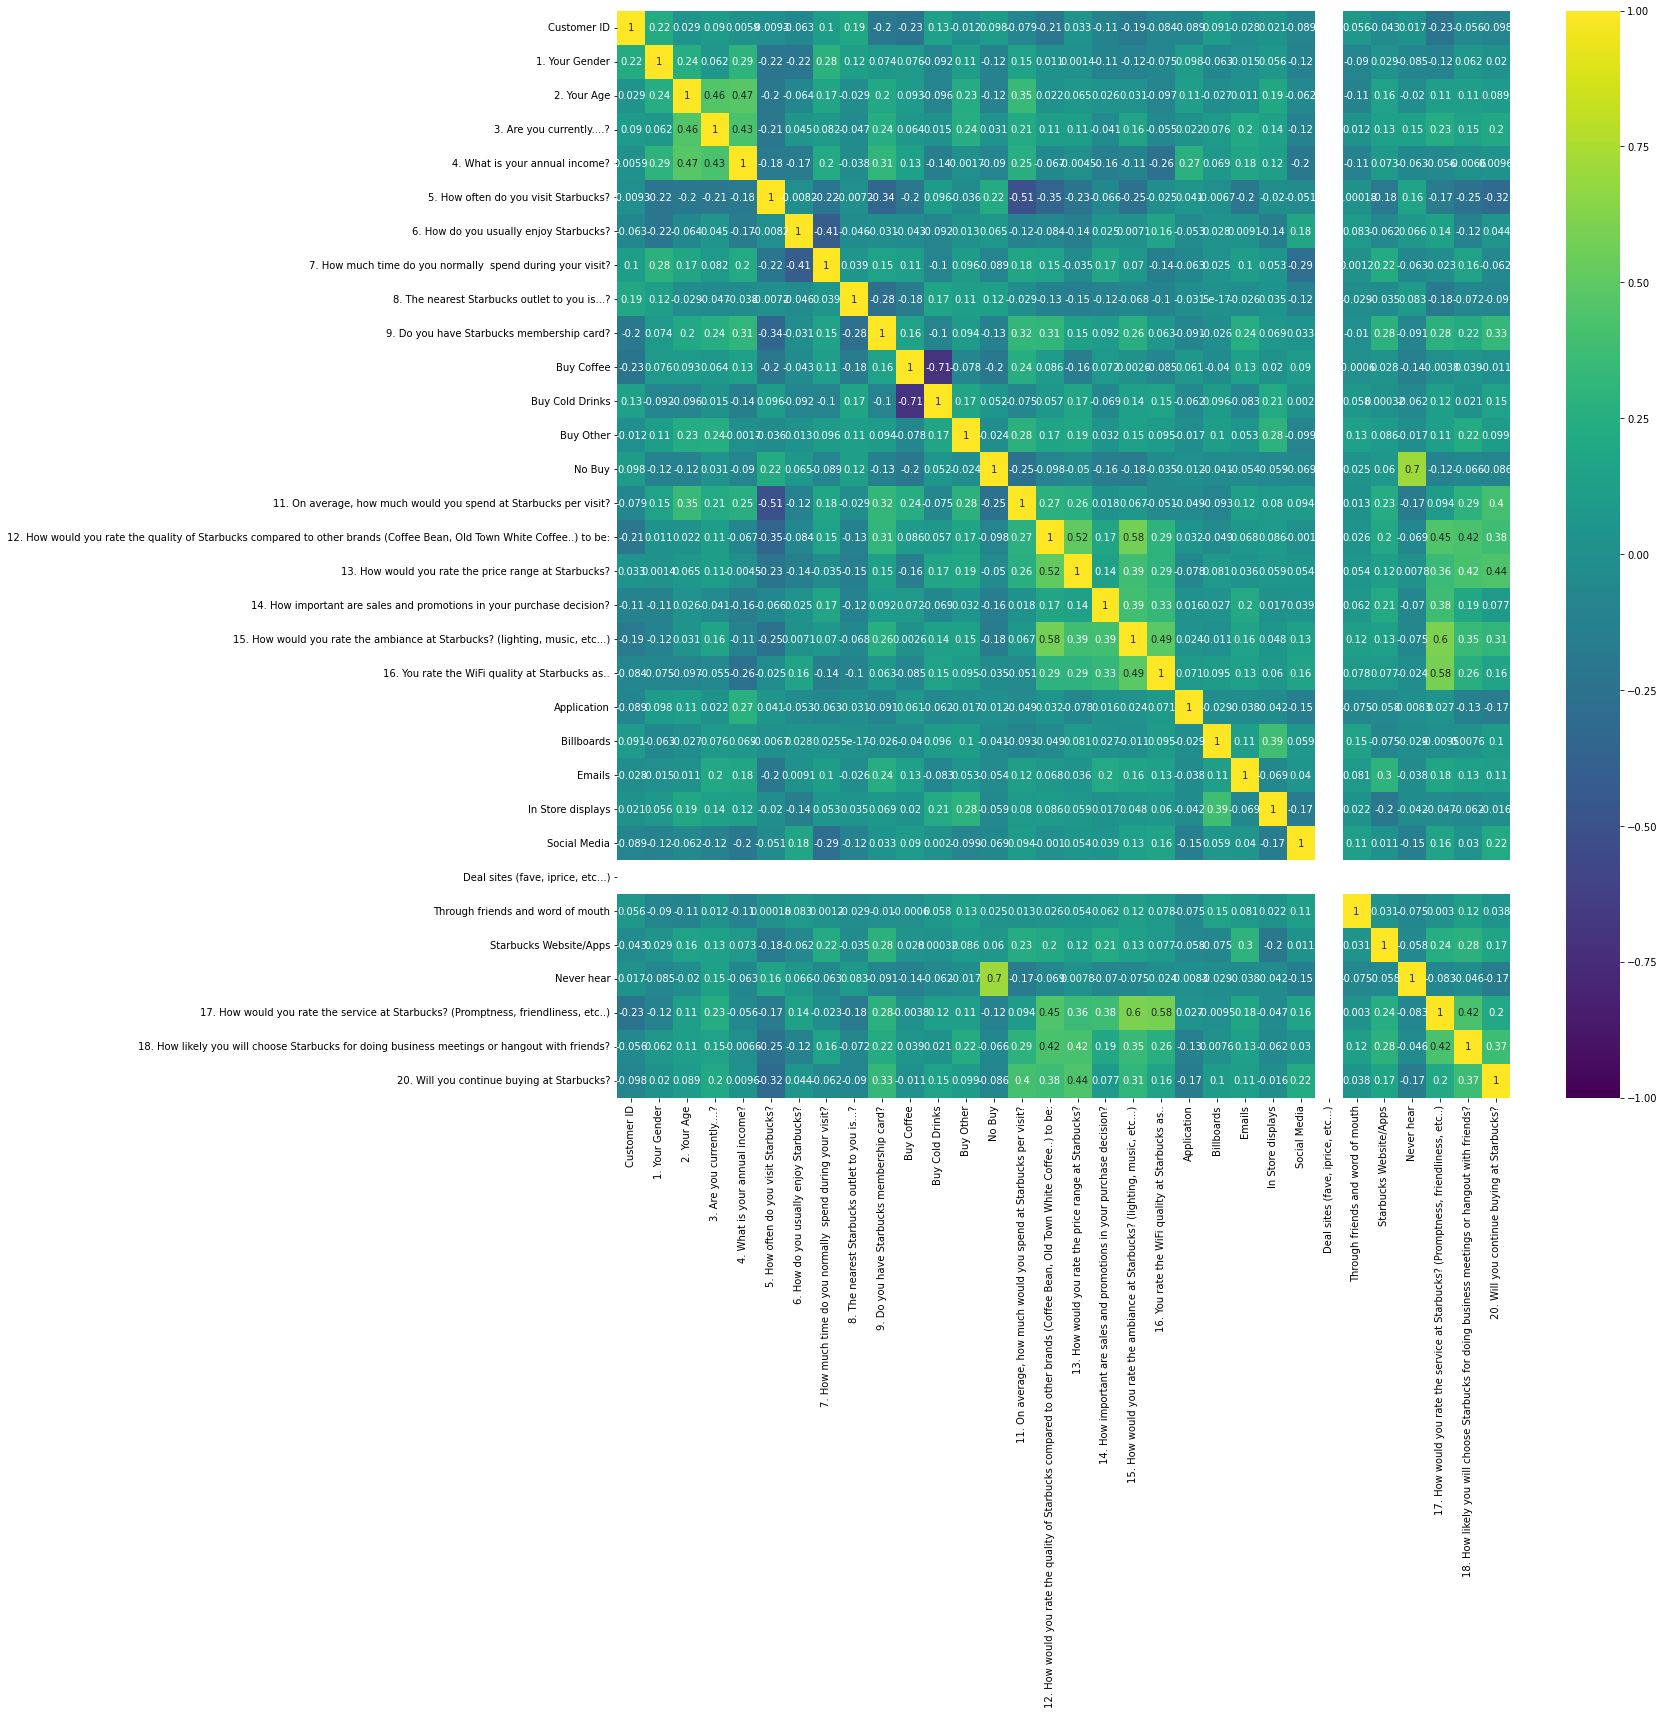

In [44]:
fig_dimensi = (20,20)
fig, ax = plt.subplots(figsize=fig_dimensi)
sns.heatmap(datasurvey.corr(),vmin=-1,vmax=1,annot=True, cmap='viridis')

Text(0.5, 1.0, 'Boxplot 4. What is your annual income?')

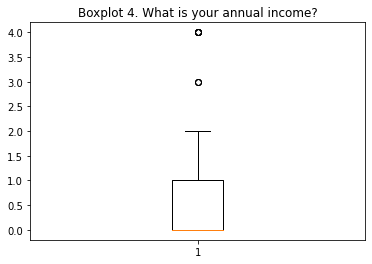

In [45]:
plt.boxplot(datasurvey['4. What is your annual income?'])
plt.title('Boxplot 4. What is your annual income?')

Text(0.5, 1.0, 'Boxplot 5. How often do you visit Starbucks?')

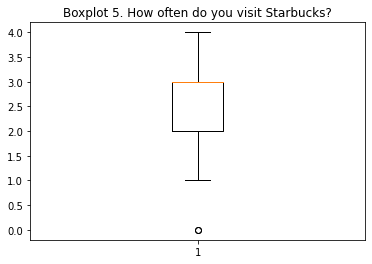

In [46]:
plt.boxplot(datasurvey['5. How often do you visit Starbucks?'])
plt.title('Boxplot 5. How often do you visit Starbucks?')

Text(0.5, 1.0, 'Boxplot 6. How do you usually enjoy Starbucks?')

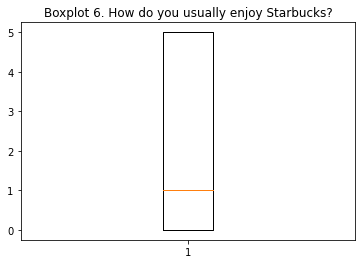

In [47]:
plt.boxplot(datasurvey['6. How do you usually enjoy Starbucks?'])
plt.title('Boxplot 6. How do you usually enjoy Starbucks?')

Text(0.5, 1.0, 'Boxplot 7. How much time do you normally  spend during your visit?')

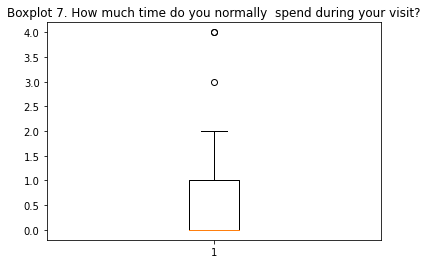

In [48]:
plt.boxplot(datasurvey['7. How much time do you normally  spend during your visit?'])
plt.title('Boxplot 7. How much time do you normally  spend during your visit?')

In [49]:
#Standardizing Variable
scaler = StandardScaler()
scaled_data = scaler.fit_transform(datasurvey[['2. Your Age','4. What is your annual income?','11. On average, how much would you spend at Starbucks per visit?']])
print(datasurvey[['2. Your Age','4. What is your annual income?','11. On average, how much would you spend at Starbucks per visit?']].head)

<bound method NDFrame.head of      2. Your Age  4. What is your annual income?  \
0              1                               0   
1              1                               0   
2              1                               0   
3              1                               0   
4              1                               0   
..           ...                             ...   
117            3                               1   
118            1                               0   
119            1                               0   
120            1                               0   
121            1                               2   

     11. On average, how much would you spend at Starbucks per visit?  
0                                                    1                 
1                                                    1                 
2                                                    1                 
3                                                    1   

Text(0, 0.5, 'Average Spending')

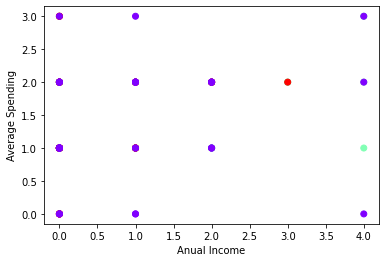

In [50]:
#Clustering Anual Income dengan On Average, how much would at starbucks per visit
#Di bawah ini kita akan buat asumsi cluster akan kita buat, misalnya secara random kita buat 3
x = datasurvey.copy()
kmeans = KMeans(3)

#fit dengan datasurvey
kmeans.fit(x)

#membuat copy input dari datasurvey
clusters = x.copy()
#beri note untuk cluster predict
clusters['cluster_pred'] = kmeans.fit_predict(x)

#buat plot grafik untuk cluster 2 kolom
plt.scatter(clusters['4. What is your annual income?'],clusters['11. On average, how much would you spend at Starbucks per visit?'],
c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Anual Income')
plt.ylabel('Average Spending')
